## Case Study: Predicting Home Prices in California



Load in the dataset and explore it.

In [27]:
import pandas
df = pandas.read_csv('~/Dropbox/datasets/cali_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [28]:
len(df)

20640

In [29]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [30]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [31]:
1+3

4

In [32]:
from matplotlib.pyplot import get_cmap
import matplotlib


In [33]:
import seaborn

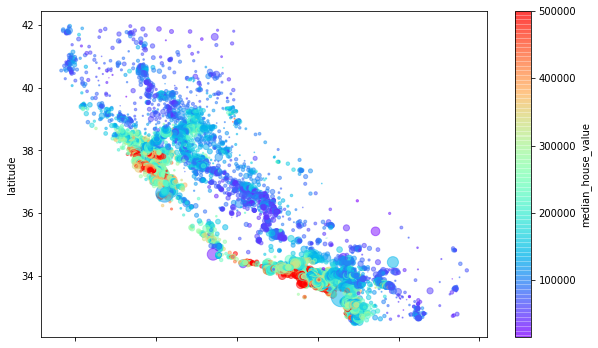

In [34]:
df.plot.scatter(x='longitude', y='latitude', figsize=(10,6), alpha=0.5, s=df.population/90, c='median_house_value', cmap=get_cmap('rainbow'))

In [35]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Dealing with missing data

In [36]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a137fcc50>]],
      dtype=object)

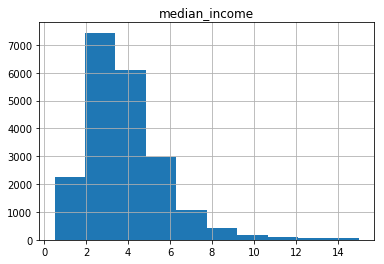

In [37]:
df[['median_income']].hist()

In [42]:
# Remove rows with missing total_bedrooms
df2 = df.dropna()

In [39]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [40]:
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [43]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [47]:
df3 = df.drop('total_bedrooms', axis=1)

In [46]:
df3.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
len(df3)

20640

In [48]:
df.drop('total_bedrooms', axis=1, inplace=True)

In [20]:
len(df)


20640

In [21]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Discretization of Continuous Variables


The problem is there are too few data points at the extreme. (right tail of the distribution).

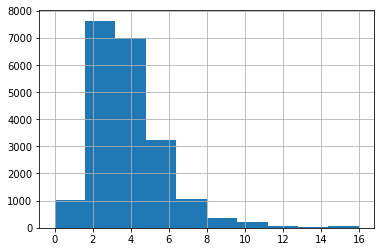

In [22]:
df.median_income.hist(range=(0,16))

In [52]:
df.median_income.describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [53]:
df['income_cat']=pandas.cut(df.median_income, [0.49, 2.56, 3.53, 4.74, 15.0], labels=[1,2,3,4])

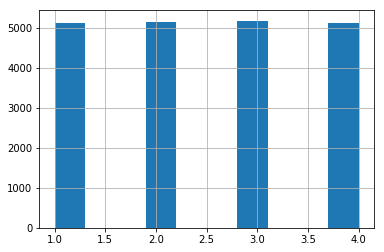

In [54]:
df.income_cat.hist()

In [66]:
import numpy


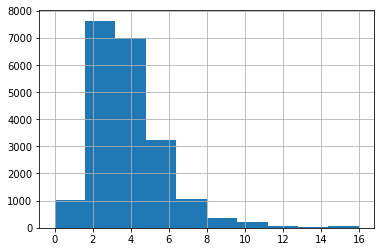

In [67]:
df.median_income.hist(range=(0,16))

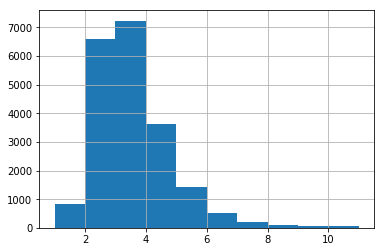

In [82]:
df['income_cat'] = numpy.ceil(df.median_income / 1.5)
df.income_cat.hist()

In [83]:
df['income_cat'] = df.income_cat.where( df.income_cat < 6 , 6)

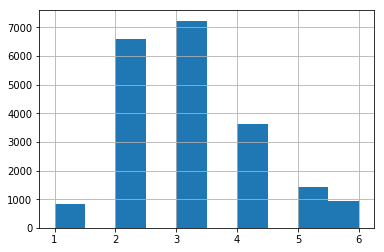

In [86]:
df.income_cat.hist()

In [87]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity', 'income_cat'],
      dtype='object')

In [88]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41,880,322,126,8.3252,452600,NEAR BAY,6.0
1,-122.22,37.86,21,7099,2401,1138,8.3014,358500,NEAR BAY,6.0
2,-122.24,37.85,52,1467,496,177,7.2574,352100,NEAR BAY,5.0
3,-122.25,37.85,52,1274,558,219,5.6431,341300,NEAR BAY,4.0
4,-122.25,37.85,52,1627,565,259,3.8462,342200,NEAR BAY,3.0



## Converting categorical variables to numerical variables

In [90]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [91]:
df.iloc[0]

longitude              -122.23
latitude                 37.88
housing_median_age          41
total_rooms                880
population                 322
households                 126
median_income           8.3252
median_house_value      452600
ocean_proximity       NEAR BAY
income_cat                   6
Name: 0, dtype: object

In [95]:
df = pandas.get_dummies(df, columns=['ocean_proximity'])

In [96]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,income_cat,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,322,126,8.3252,452600,6.0,0,0,0,1,0
1,-122.22,37.86,21,7099,2401,1138,8.3014,358500,6.0,0,0,0,1,0
2,-122.24,37.85,52,1467,496,177,7.2574,352100,5.0,0,0,0,1,0
3,-122.25,37.85,52,1274,558,219,5.6431,341300,4.0,0,0,0,1,0
4,-122.25,37.85,52,1627,565,259,3.8462,342200,3.0,0,0,0,1,0


In [97]:
y = df.median_house_value
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [98]:
X = df[ ['income_cat'] ]